In [1]:
# pip install yfinance

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

In [3]:

end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [4]:
stock = "AMZN"
google_data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [5]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-09-08,1.9245,1.9405,1.8855,1.9005,1.9005,132226000
2004-09-09,1.9120,1.9155,1.8680,1.9035,1.9035,139134000
2004-09-10,1.9065,1.9400,1.8950,1.9285,1.9285,92690000
2004-09-13,1.9565,2.0020,1.9410,2.0005,2.0005,161304000
2004-09-14,2.0100,2.1375,1.9950,2.1335,2.1335,317442000


In [6]:
google_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-08-30,172.779999,178.899994,172.600006,178.500000,178.500000,43429400
2024-09-03,177.550003,178.259995,175.259995,176.250000,176.250000,37817500
2024-09-04,174.479996,175.979996,172.539993,173.330002,173.330002,30309200
2024-09-05,175.000000,179.880005,175.000000,177.889999,177.889999,40170500
2024-09-06,177.240005,178.380005,171.160004,171.389999,171.389999,41179000


In [7]:
google_data.shape

(5034, 6)

In [8]:
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5034.000000,5034.000000,5034.000000,5034.000000,5034.000000,5.034000e+03
mean,51.162020,51.752995,50.517800,51.148549,51.148549,1.071461e+08
std,58.060870,58.723987,57.326991,58.026734,58.026734,9.116885e+07
min,1.304500,1.315000,1.288000,1.303500,1.303500,1.762600e+07
25%,4.639125,4.705125,4.570375,4.652625,4.652625,5.854300e+07
50%,17.627000,17.799750,17.320500,17.607500,17.607500,8.542200e+07
75%,92.043753,92.901377,90.900002,92.142002,92.142002,1.290895e+08
max,200.089996,201.199997,199.050003,200.000000,200.000000,2.086584e+09


In [9]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5034 entries, 2004-09-08 to 2024-09-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5034 non-null   float64
 1   High       5034 non-null   float64
 2   Low        5034 non-null   float64
 3   Close      5034 non-null   float64
 4   Adj Close  5034 non-null   float64
 5   Volume     5034 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.3 KB


In [10]:
google_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

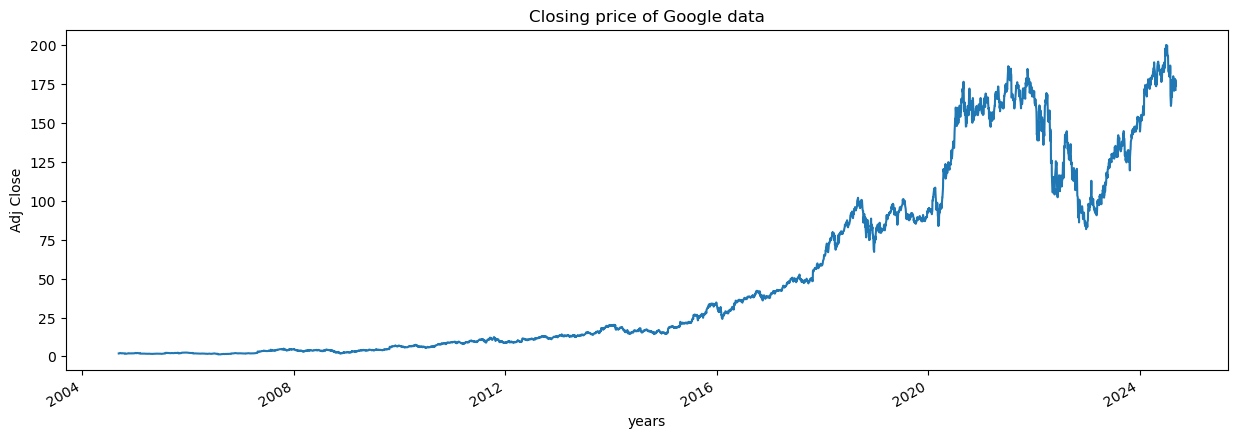

In [12]:
plt.figure(figsize = (15,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google data")

In [13]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")
    

In [14]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

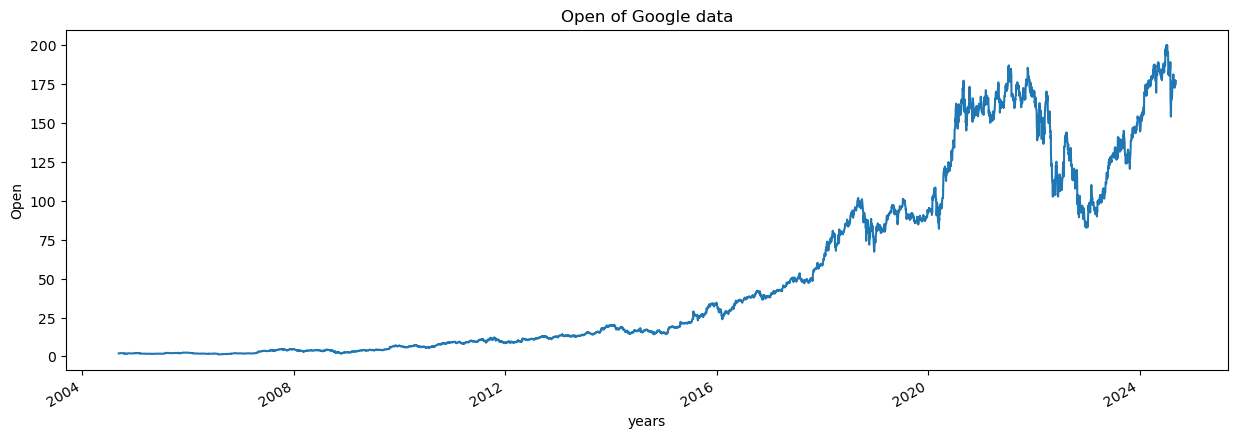

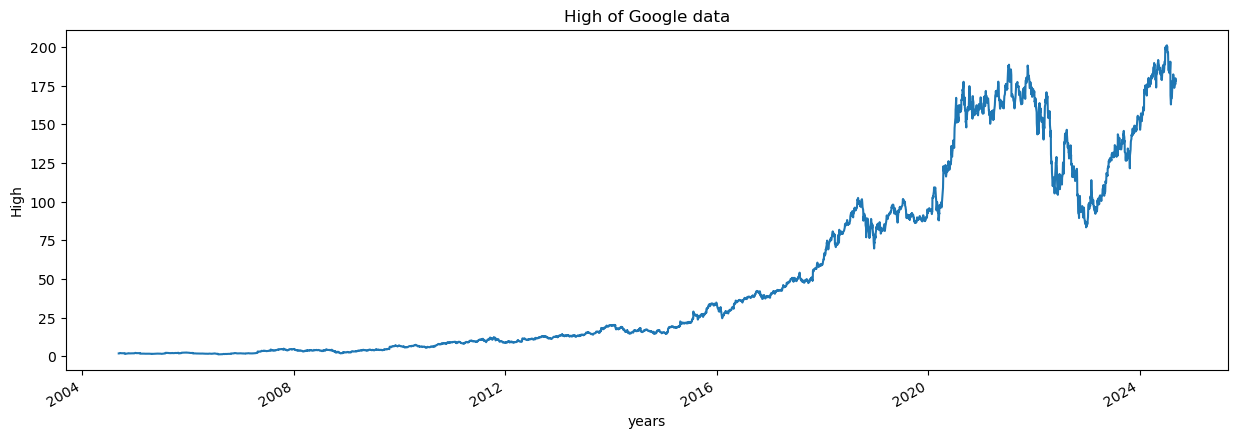

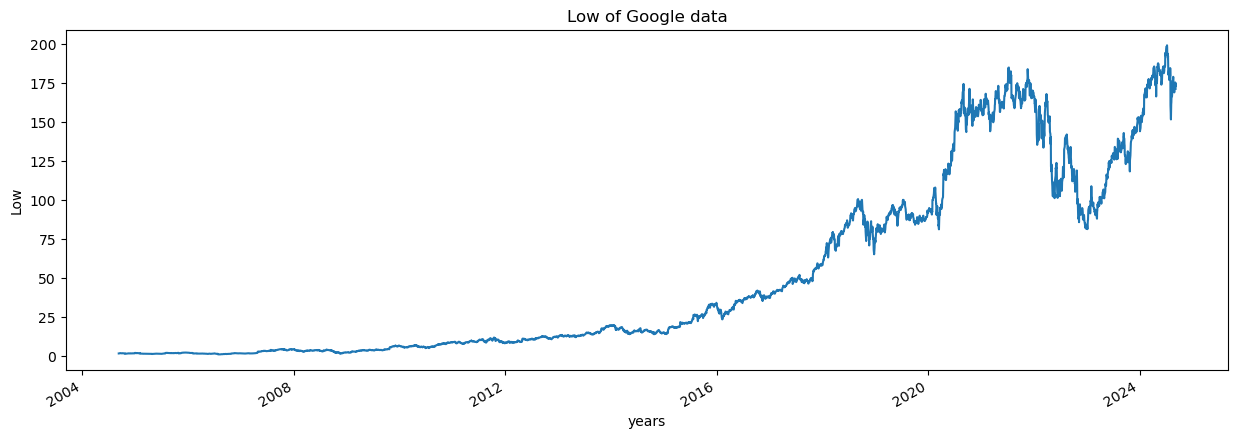

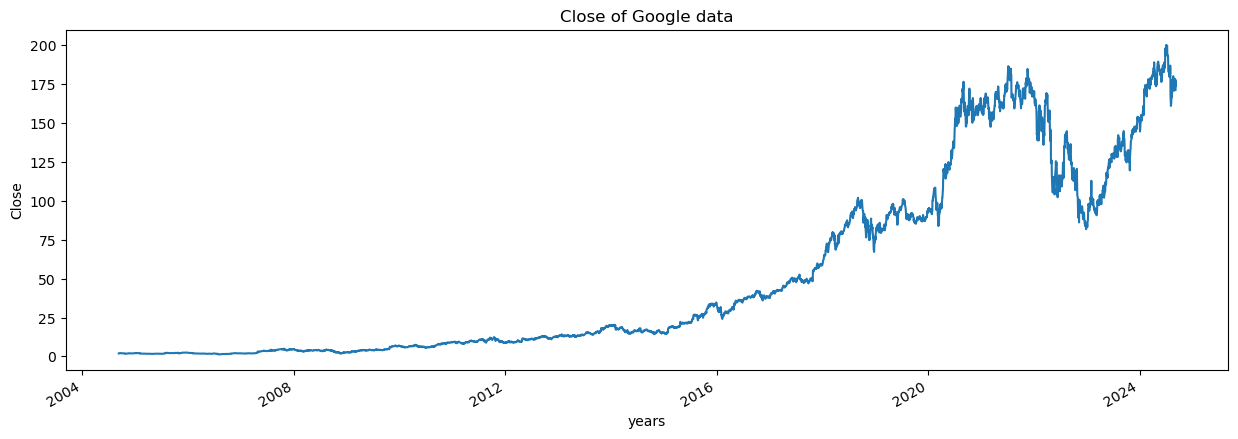

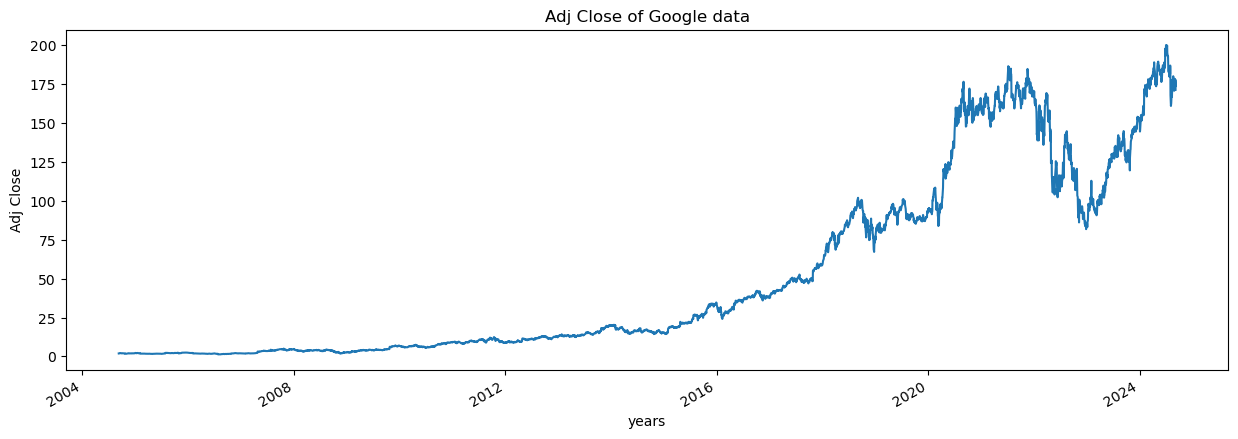

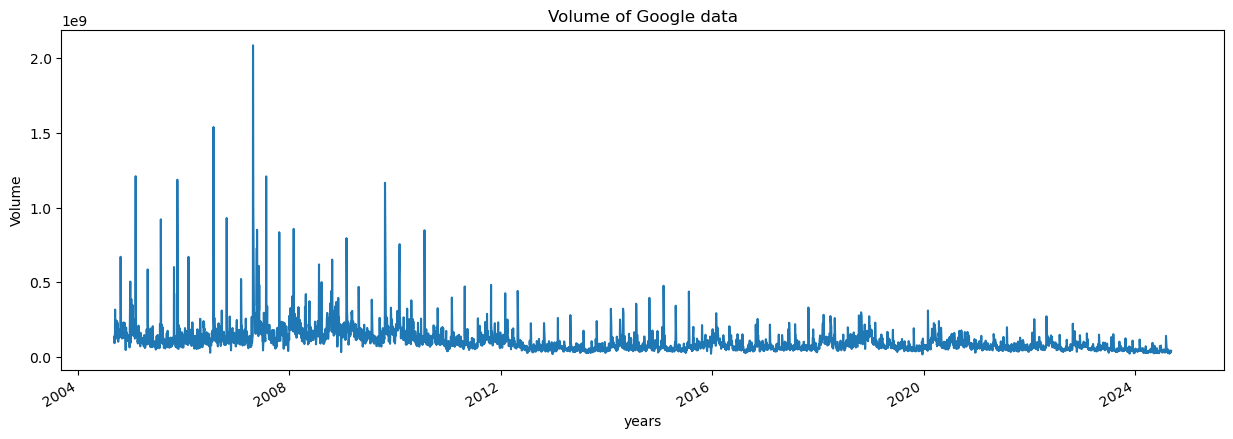

In [15]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [16]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# MA for 5 days ==> null null null null 30 40 50 60 70 80

In [17]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [18]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [19]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [20]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 81
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 172


In [21]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [22]:
google_data['MA_for_250_days'][0:250].tail()

Date
2005-08-26         NaN
2005-08-29         NaN
2005-08-30         NaN
2005-08-31         NaN
2005-09-01    1.902566
Name: MA_for_250_days, dtype: float64

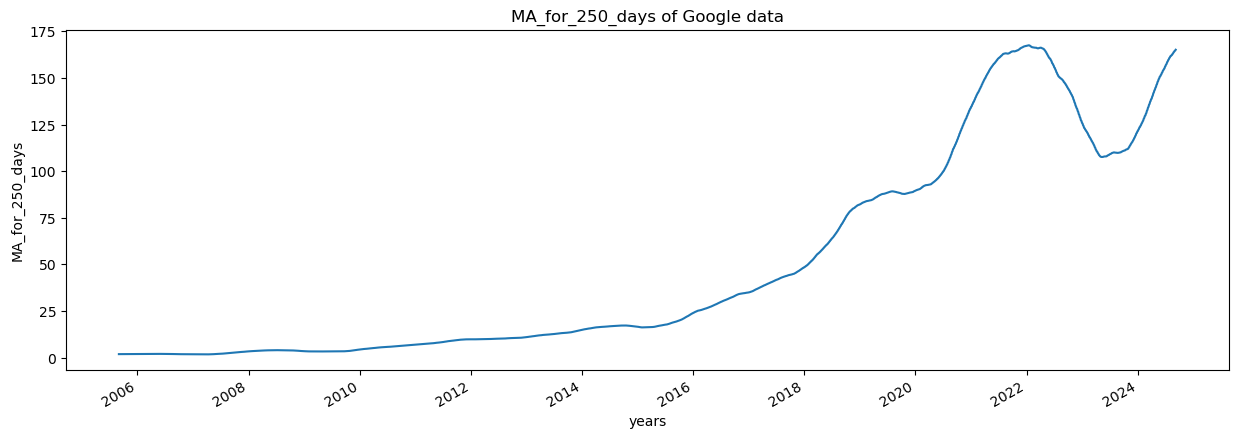

In [23]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

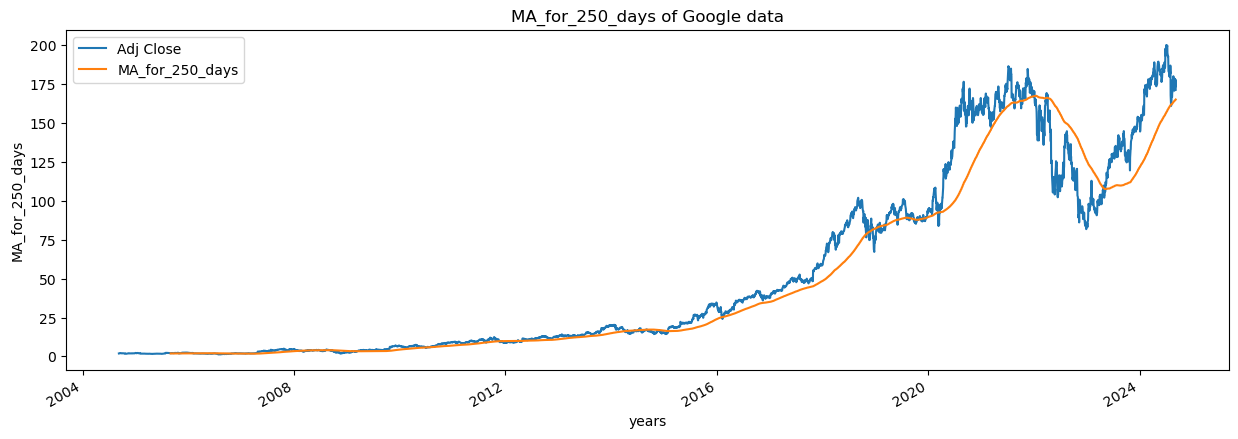

In [24]:
plot_graph((15,5), google_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

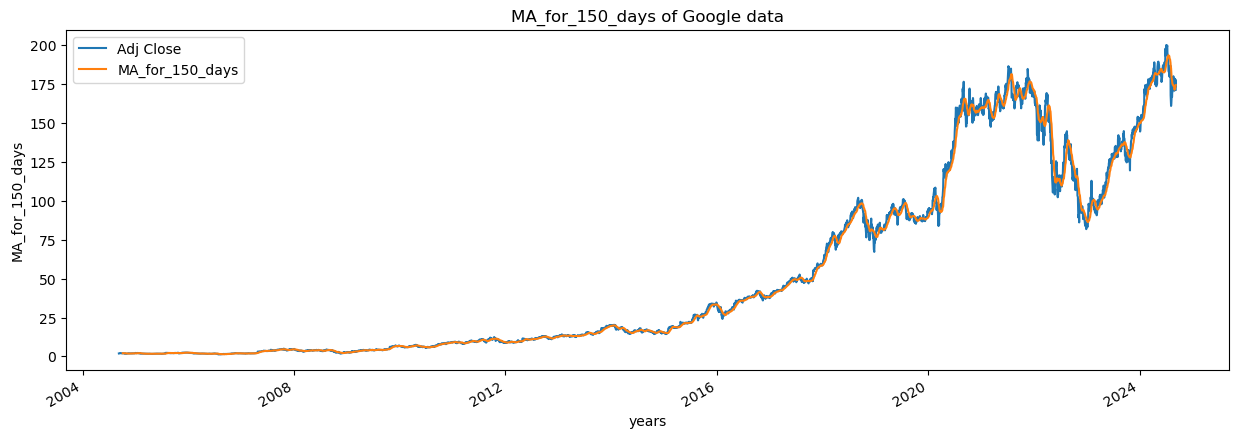

In [25]:
google_data['MA_for_150_days'] = google_data['Adj Close'].rolling(20).mean()
plot_graph((15,5), google_data[['Adj Close','MA_for_150_days']], 'MA_for_150_days')

In [29]:
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

KeyError: "['MA_for_100_days'] not in index"

In [30]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2004-09-08,1.9005,NaN
2004-09-09,1.9035,0.001578
2004-09-10,1.9285,0.013134
2004-09-13,2.0005,0.037335
2004-09-14,2.1335,0.066483


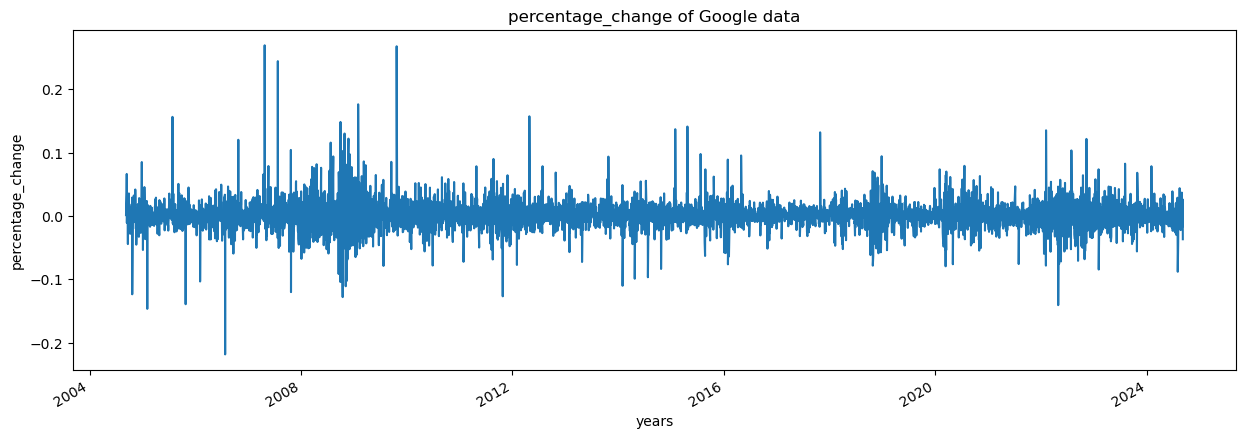

In [31]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [32]:
Adj_close_price = google_data[['Adj Close']]

In [33]:
max(Adj_close_price.values),min(Adj_close_price.values) 

(array([200.]), array([1.30350006]))

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.00300458],
       [0.00301968],
       [0.0031455 ],
       ...,
       [0.8657752 ],
       [0.88872476],
       [0.85601155]])

In [35]:
len(scaled_data)

5034

In [36]:
x_data = []
y_data = []

for i in range(20, len(scaled_data)):
    x_data.append(scaled_data[i-20:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [37]:
x_data[0],y_data[0]

(array([[0.00300458],
        [0.00301968],
        [0.0031455 ],
        [0.00350786],
        [0.00417723],
        [0.00406147],
        [0.00415206],
        [0.0042502 ],
        [0.00432821],
        [0.00433324],
        [0.00385261],
        [0.00396585],
        [0.00374189],
        [0.00348773],
        [0.00336191],
        [0.00371672],
        [0.00372176],
        [0.00362362],
        [0.0037595 ],
        [0.00374692]]),
 array([0.00384758]))

In [38]:

int(len(x_data)*0.7)

3509

In [39]:
4908-100-int(len(x_data)*0.7)

1299

In [40]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [41]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3509, 20, 1)
(3509, 1)
(1505, 20, 1)
(1505, 1)


In [42]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [43]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [44]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [45]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3509/3509 [==============================] - 52s 14ms/step - loss: 2.4630e-04
Epoch 2/2
3509/3509 [==============================] - 46s 13ms/step - loss: 7.9568e-05


In [210]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_38 (LSTM)              (None, 20, 128)           66560     
                                                                 
 lstm_39 (LSTM)              (None, 64)                49408     
                                                                 
 dense_38 (Dense)            (None, 25)                1625      
                                                                 
 dense_39 (Dense)            (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [211]:
predictions = model.predict(x_test)

48/48 [==============================] - 2s 17ms/step


In [212]:
predictions

array([[0.480041  ],
       [0.48099166],
       [0.48353258],
       ...,
       [0.80195016],
       [0.81560546],
       [0.82217324]], dtype=float32)

In [213]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 96.68597],
       [ 96.87486],
       [ 97.37973],
       ...,
       [160.6482 ],
       [163.36145],
       [164.66644]], dtype=float32)

In [214]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 95.26950073],
       [ 96.38400269],
       [ 96.64099884],
       ...,
       [177.58999634],
       [177.05999756],
       [177.61999512]])

In [215]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [216]:
rmse

7.22958089647427

In [48]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2018-09-20,52.474991,54.096447
2018-09-21,51.909775,54.122913
2018-09-24,52.656242,54.015766
2018-09-25,52.990131,54.172199
2018-09-26,52.568008,54.449051


<Figure size 640x480 with 0 Axes>

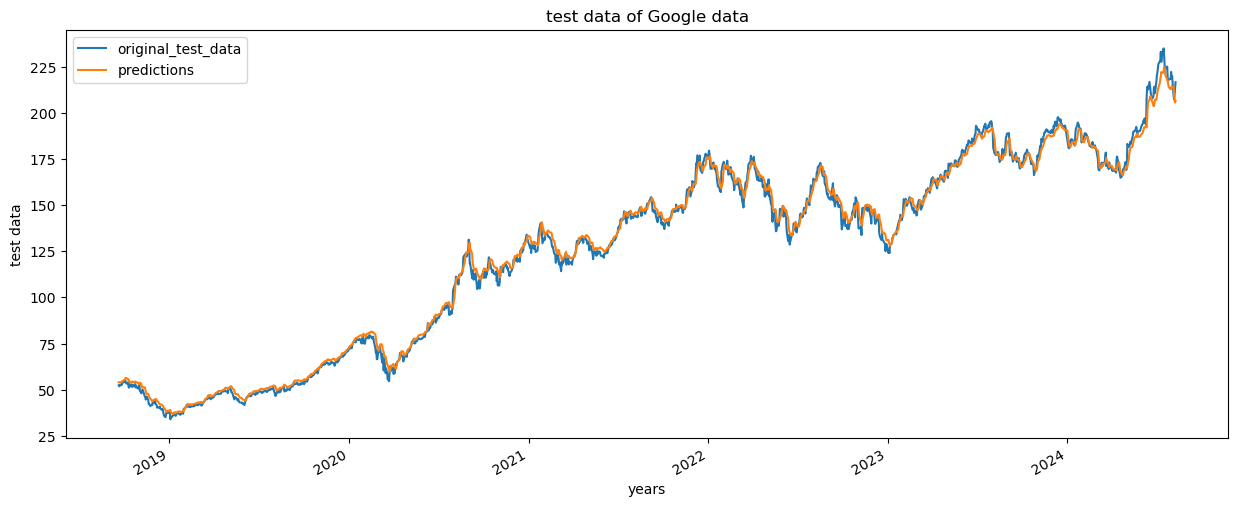

In [49]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

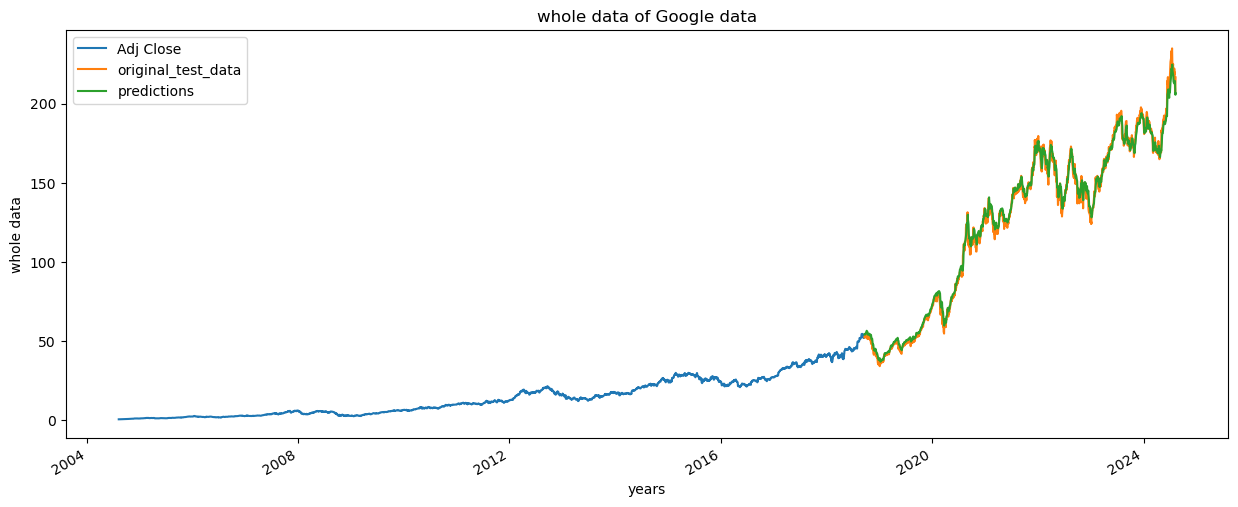

In [50]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [51]:
model.save("Latest_stock_price_model.keras")

In [55]:
# Get the last 100 days of adjusted closing prices
last_100_days = Adj_close_price[-100:]

# Scale the data to be between 0 and 1
scaled_last_100_days = scaler.transform(last_100_days)

# Reshape the data to match the model's input shape
scaled_last_100_days = np.array(scaled_last_100_days)
scaled_last_100_days = np.reshape(scaled_last_100_days, (1, scaled_last_100_days.shape[0], 1))

# Predict the closing price for today
predicted_price_today = model.predict(scaled_last_100_days)

# Inverse transform to get the actual predicted price
predicted_price_today = scaler.inverse_transform(predicted_price_today)
predicted_price_today = predicted_price_today[0][0]

# Get the actual closing price for today from the data using .iloc
actual_price_today = Adj_close_price.iloc[-1, 0]

# Display the predicted and actual prices
print(f"Predicted closing price for today: ${predicted_price_today:.2f}")
print(f"Actual closing price for today: ${actual_price_today:.2f}")


1/1 [==============================] - 0s 56ms/step
Predicted closing price for today: $208.67
Actual closing price for today: $216.54


In [57]:
# Get the last 100 days of data up until yesterday
last_100_days_yesterday = Adj_close_price[-101:-1]

# Scale the data
scaled_last_100_days_yesterday = scaler.transform(last_100_days_yesterday)

# Reshape the data to match the model's input shape
scaled_last_100_days_yesterday = np.array(scaled_last_100_days_yesterday)
scaled_last_100_days_yesterday = np.reshape(scaled_last_100_days_yesterday, (1, scaled_last_100_days_yesterday.shape[0], 1))

# Predict the closing price for today using data up until yesterday
predicted_price_yesterday = model.predict(scaled_last_100_days_yesterday)

# Inverse transform to get the actual predicted price
predicted_price_yesterday = scaler.inverse_transform(predicted_price_yesterday)
predicted_price_yesterday = predicted_price_yesterday[0][0]

# Get the actual closing price for today
actual_price_today = Adj_close_price.iloc[-1,0]

print(f"Predicted closing price for today (using yesterday's data): ${predicted_price_yesterday:.2f}")
print(f"Actual closing price for today: ${actual_price_today:.2f}")


1/1 [==============================] - 0s 53ms/step
Predicted closing price for today (using yesterday's data): $206.46
Actual closing price for today: $216.54


In [58]:
# Calculate the percentage error
percentage_error = abs((predicted_price_yesterday - actual_price_today) / actual_price_today) * 100
print(f"Percentage error in prediction: {percentage_error:.2f}%")


Percentage error in prediction: 4.65%


End

In [1]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT']

end = datetime.now()
start = datetime(end.year - 20, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

NameError: name 'datetime' is not defined

In [37]:
# Define the company list and their respective names
company_list = [AAPL, GOOG, MSFT]
company_name = ["APPLE", "GOOGLE", "MICROSOFT"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-08-23,416.980011,419.260010,412.089996,416.790009,416.790009,18493800,MICROSOFT
2024-08-26,416.369995,417.279999,411.339996,413.489990,413.489990,13152800,MICROSOFT
2024-08-27,412.859985,414.359985,410.250000,413.839996,413.839996,13492900,MICROSOFT
2024-08-28,414.880005,415.000000,407.309998,410.600006,410.600006,14882700,MICROSOFT
2024-08-29,414.940002,422.049988,410.600006,413.119995,413.119995,17045200,MICROSOFT
2024-08-30,415.600006,417.489990,412.130005,417.140015,417.140015,24308300,MICROSOFT
2024-09-03,417.910004,419.880005,407.029999,409.440002,409.440002,20285900,MICROSOFT
2024-09-04,405.910004,411.239990,404.369995,408.899994,408.899994,15135800,MICROSOFT
2024-09-05,407.619995,413.100006,406.130005,408.390015,408.390015,14195500,MICROSOFT


In [38]:
AAPL.describe()
#We have only 255 records in one year because weekends are not included in the data

,Open,High,Low,Close,Adj Close,Volume
count,5035.000000,5035.000000,5035.000000,5035.000000,5035.000000,5.035000e+03
mean,49.519014,50.049909,49.010346,49.550896,47.831426,3.960548e+08
std,59.327136,59.967961,58.733335,59.376390,59.324579,3.993995e+08
min,0.628571,0.633571,0.621071,0.628571,0.530813,2.404830e+07
25%,6.724286,6.787678,6.626786,6.718035,5.673215,1.041098e+08
50%,24.000000,24.209999,23.769644,24.010000,21.472326,2.479184e+08
75%,55.707500,56.225000,55.004999,55.773750,53.423952,5.705322e+08
max,236.479996,237.229996,233.089996,234.820007,234.548523,3.372970e+09


In [39]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5035 entries, 2004-09-07 to 2024-09-06
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          5035 non-null   float64
 1   High          5035 non-null   float64
 2   Low           5035 non-null   float64
 3   Close         5035 non-null   float64
 4   Adj Close     5035 non-null   float64
 5   Volume        5035 non-null   int64  
 6   company_name  5035 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 314.7+ KB


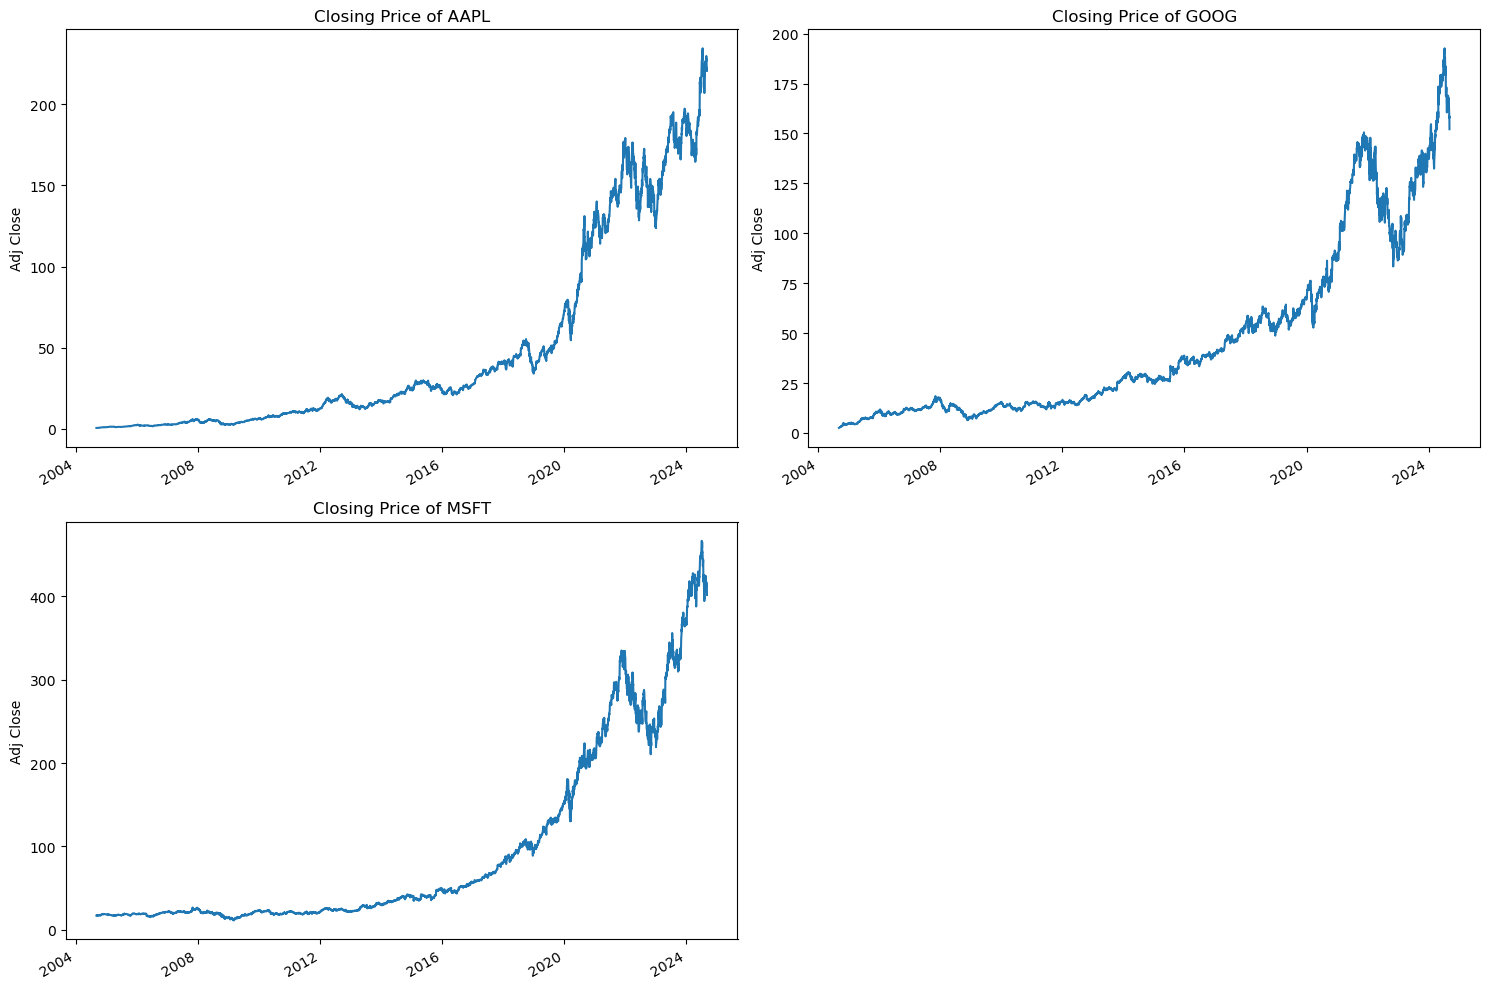

In [40]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

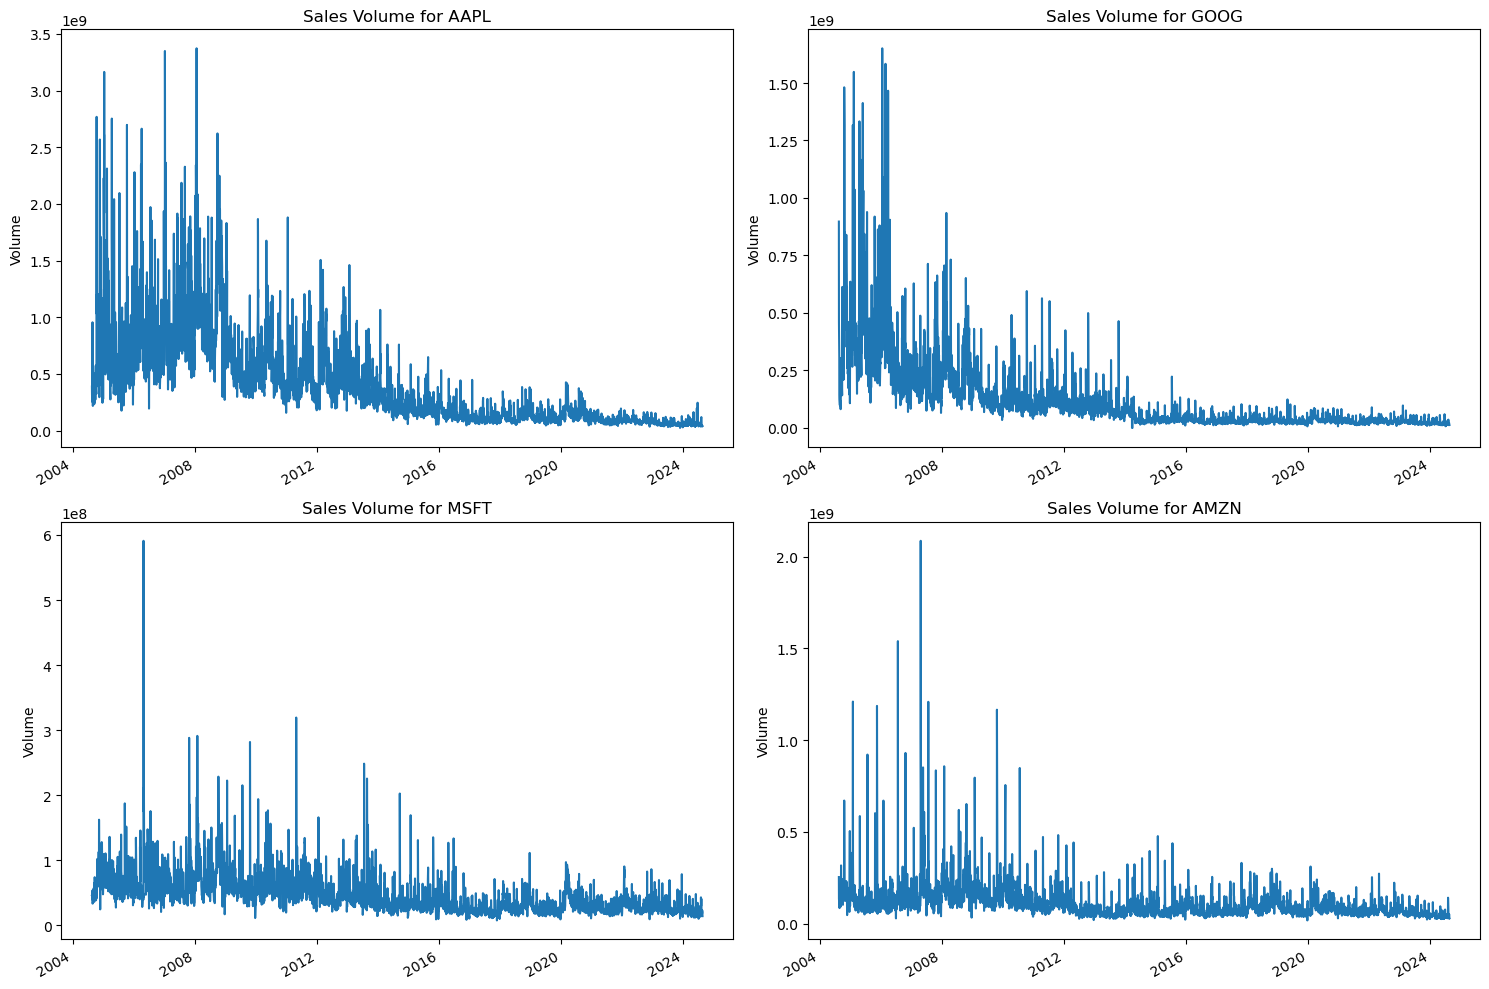

In [16]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

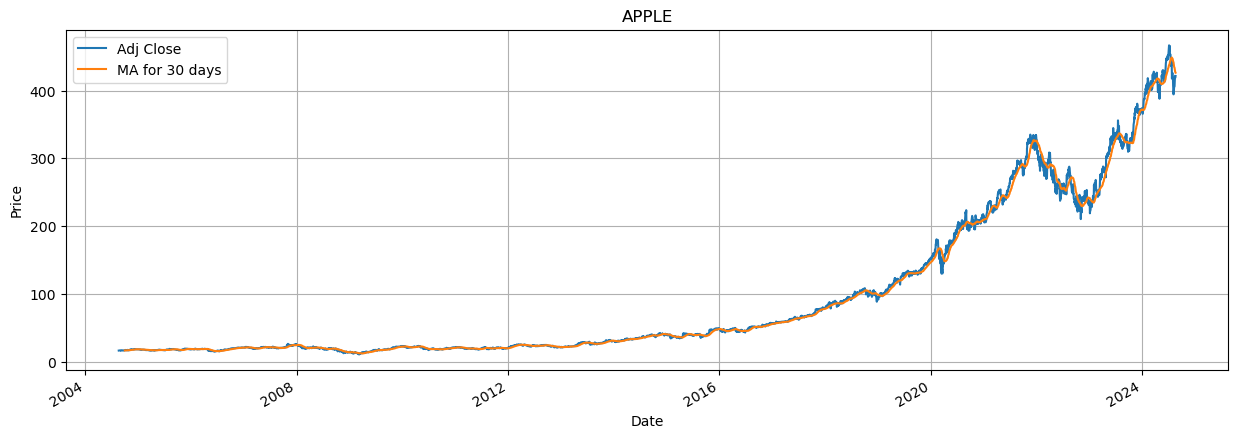

In [17]:
# Calculate moving averages for a single company (AAPL in this example)
ma_day = [30]

for ma in ma_day:
    MSFT[f"MA for {ma} days"] = MSFT['Adj Close'].rolling(ma).mean()

# Plotting the data for AAPL with increased width
MSFT[['Adj Close', 'MA for 30 days']].plot(figsize=(15, 5))  # Increased width to 20
plt.title('APPLE')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()




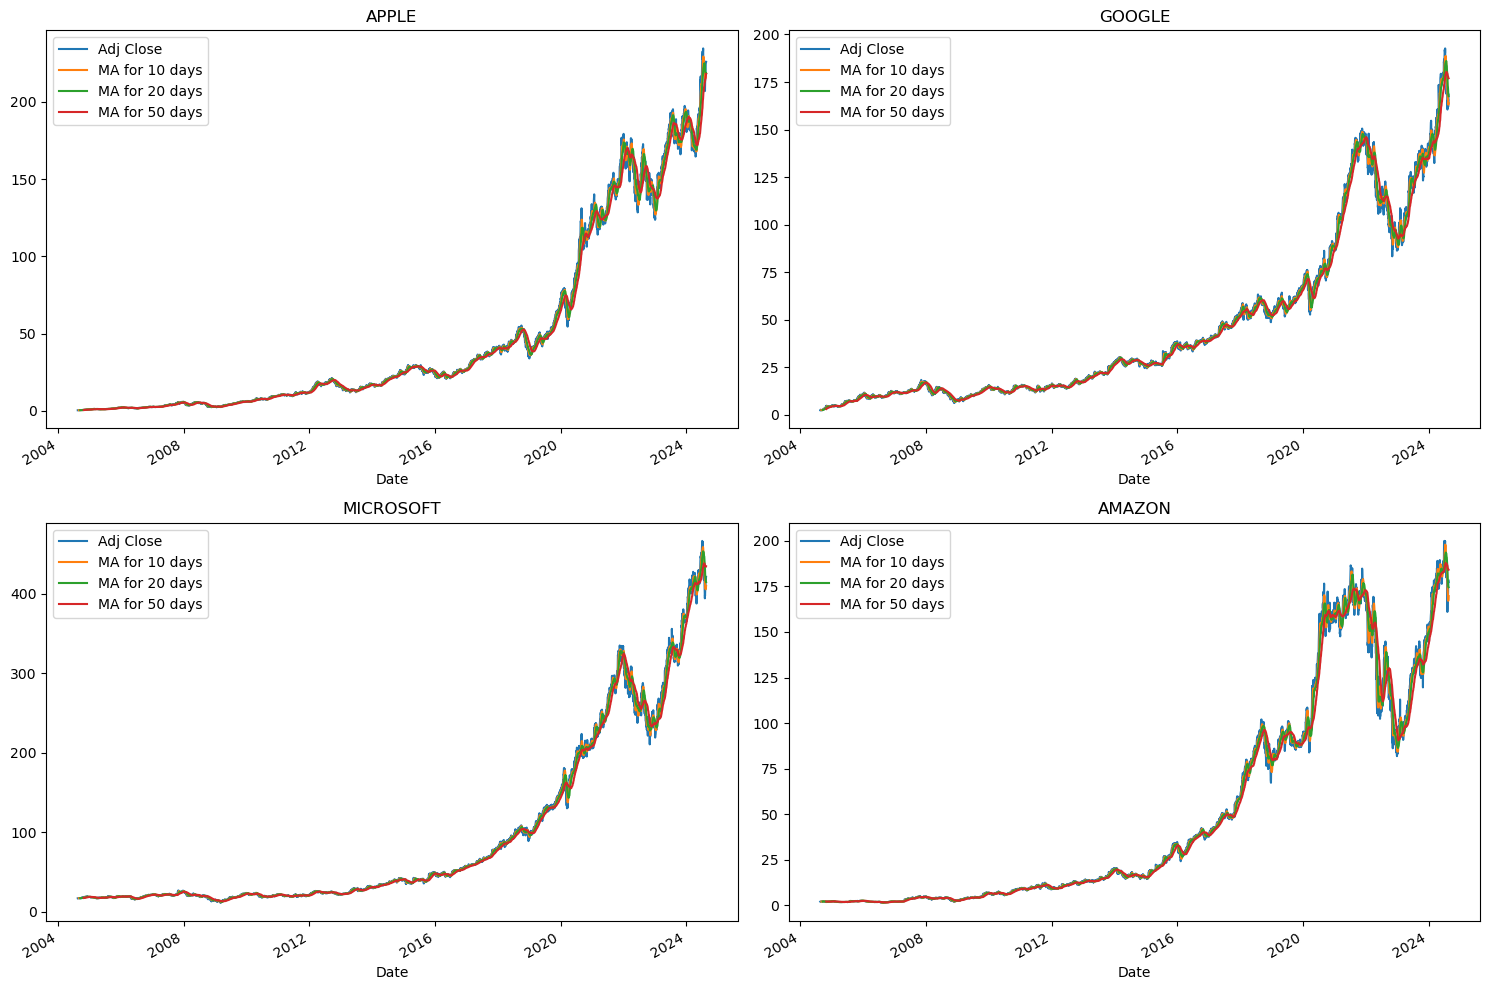

In [18]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()


In [47]:
company_data = {}
for stock in tech_list:
    data = yf.download(stock, start, end)
    Adj_close_price = data[['Adj Close']]
    
    # Scaling the data
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(Adj_close_price)
    
    # Prepare the dataset for LSTM
    x_data = []
    y_data = []
    
    for i in range(20, len(scaled_data)):
        x_data.append(scaled_data[i-20:i])
        y_data.append(scaled_data[i])
    
    x_data, y_data = np.array(x_data), np.array(y_data)
    
    # Split the data into training and testing sets
    splitting_len = int(len(x_data) * 0.7)
    x_train = x_data[:splitting_len]
    y_train = y_data[:splitting_len]
    x_test = x_data[splitting_len:]
    y_test = y_data[splitting_len:]
    
    # Store the results in a dictionary for each company
    company_data[stock] = {
        'Adj_close_price': Adj_close_price,
        'scaled_data': scaled_data,
        'x_train': x_train,
        'y_train': y_train,
        'x_test': x_test,
        'y_test': y_test,
        'scaler': scaler
    }
    
    print(f"Processed {stock}: x_train shape: {x_train.shape}, y_train shape: {y_train.shape}, x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")


[*********************100%%**********************]  1 of 1 completed


Processed AAPL: x_train shape: (3509, 20, 1), y_train shape: (3509, 1), x_test shape: (1505, 20, 1), y_test shape: (1505, 1)


[*********************100%%**********************]  1 of 1 completed


Processed GOOG: x_train shape: (3509, 20, 1), y_train shape: (3509, 1), x_test shape: (1505, 20, 1), y_test shape: (1505, 1)


[*********************100%%**********************]  1 of 1 completed

Processed MSFT: x_train shape: (3509, 20, 1), y_train shape: (3509, 1), x_test shape: (1505, 20, 1), y_test shape: (1505, 1)


In [22]:
from keras.callbacks import EarlyStopping

# Model Training with Optimizations
for stock in tech_list:
    data = company_data[stock]
    x_train = data['x_train']
    y_train = data['y_train']
    
    # Build and compile the LSTM model
    model = Sequential()
    model.add(LSTM(64, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(32, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Early stopping to prevent overfitting and save time
    early_stopping = EarlyStopping(monitor='loss', patience=1)
    
    # Fit the model with a larger batch size and fewer epochs
    model.fit(x_train, y_train, batch_size=32, epochs=2, callbacks=[early_stopping])
    
    # Store the model in the dictionary
    company_data[stock]['model'] = model
    
    # Print model summary and shapes for verification
    print(f"Trained model for {stock}")
    model.summary()


Epoch 1/2
110/110 [==============================] - 8s 24ms/step - loss: 1.8913e-04
Epoch 2/2
110/110 [==============================] - 2s 22ms/step - loss: 7.9955e-06
Trained model for AAPL
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 64)            16896     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 25)                825       
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 30,163
Trainable params: 30,163
Non-trainable params: 0
_________________________________________________________

In [46]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Dictionary to store results for all companies
all_results = {}

# Dictionary to store RMSE for all companies
rmse_results = {}

# Loop through each company in the tech list
for stock in tech_list:
    # Extract relevant data and model for the current stock
    x_test = company_data[stock]['x_test']
    scaler = company_data[stock]['scaler']
    y_test = company_data[stock]['y_test']
    model = company_data[stock]['model']
    
    # Make predictions
    predictions = model.predict(x_test)
    
    # Inverse transform the predictions and actual values
    inv_predictions = scaler.inverse_transform(predictions)
    inv_y_test = scaler.inverse_transform(y_test)
    
    # Store results in the all_results dictionary
    all_results[stock] = {
        'predictions': inv_predictions,
        'actual': inv_y_test
    }
    
    # Compute RMSE
    rmse = np.sqrt(mean_squared_error(inv_y_test, inv_predictions))
    rmse_results[stock] = rmse

# Print the results and RMSE for all companies
for stock, result in all_results.items():
    print(f"\nResults for {stock}:")
    print(f"Predictions (first 5): {result['predictions'].flatten()[:5]}")  # Displaying first 5 for brevity
    print(f"Actual Values (first 5): {result['actual'].flatten()[:5]}")     # Displaying first 5 for brevity
    print(f"Prediction Shape: {result['predictions'].shape}")
    print(f"Actual Shape: {result['actual'].shape}")

# Print RMSE results
for stock, rmse in rmse_results.items():
    print(f"\nRMSE for {stock}: {rmse:.2f}")


NameError: name 'company_data' is not defined

In [25]:
import numpy as np

# Dictionary to store results for all companies
all_results = {}

# Loop through each company in the tech list
for stock in tech_list:
    # Extract relevant data and model for the current stock
    x_test = company_data[stock]['x_test']
    scaler = company_data[stock]['scaler']
    y_test = company_data[stock]['y_test']
    model = company_data[stock]['model']
    
    # Make predictions
    predictions = model.predict(x_test)
    
    # Inverse transform the predictions and actual values
    inv_predictions = scaler.inverse_transform(predictions)
    inv_y_test = scaler.inverse_transform(y_test)
    
    # Store results in the all_results dictionary
    all_results[stock] = {
        'predictions': inv_predictions,
        'actual': inv_y_test
    }

# Print the results for all companies
for stock, result in all_results.items():
    print(f"\nResults for {stock}:")
    print(f"Predictions (first 5): {result['predictions'].flatten()[:5]}")  # Displaying first 5 for brevity
    print(f"Actual Values (first 5): {result['actual'].flatten()[:5]}")     # Displaying first 5 for brevity
    print(f"Prediction Shape: {result['predictions'].shape}")
    print(f"Actual Shape: {result['actual'].shape}")


48/48 [==============================] - 1s 10ms/step

Results for AAPL:
Predictions (first 5): [50.758068 50.969738 51.18034  51.398376 51.633095]
Actual Values (first 5): [51.49243546 51.91646194 52.33571243 53.1170578  53.60540009]
Prediction Shape: (1505, 1)
Actual Shape: (1505, 1)

Results for GOOG:
Predictions (first 5): [62.77278  62.684242 62.675278 62.694195 62.767265]
Actual Values (first 5): [60.96312714 62.02042389 61.48752975 62.39399719 61.88557816]
Prediction Shape: (1505, 1)
Actual Shape: (1505, 1)

Results for MSFT:
Predictions (first 5): [105.26269  105.254654 105.343765 105.48418  105.718544]
Actual Values (first 5): [101.93643951 103.06487274 103.68554688 105.3405838  105.27474976]
Prediction Shape: (1505, 1)
Actual Shape: (1505, 1)

Results for AMZN:
Predictions (first 5): [93.61748 93.76842 93.96929 94.20099 94.58181]
Actual Values (first 5): [ 95.26950073  96.38400269  96.64099884  99.90499878 100.1190033 ]
Prediction Shape: (1505, 1)
Actual Shape: (1505, 1)


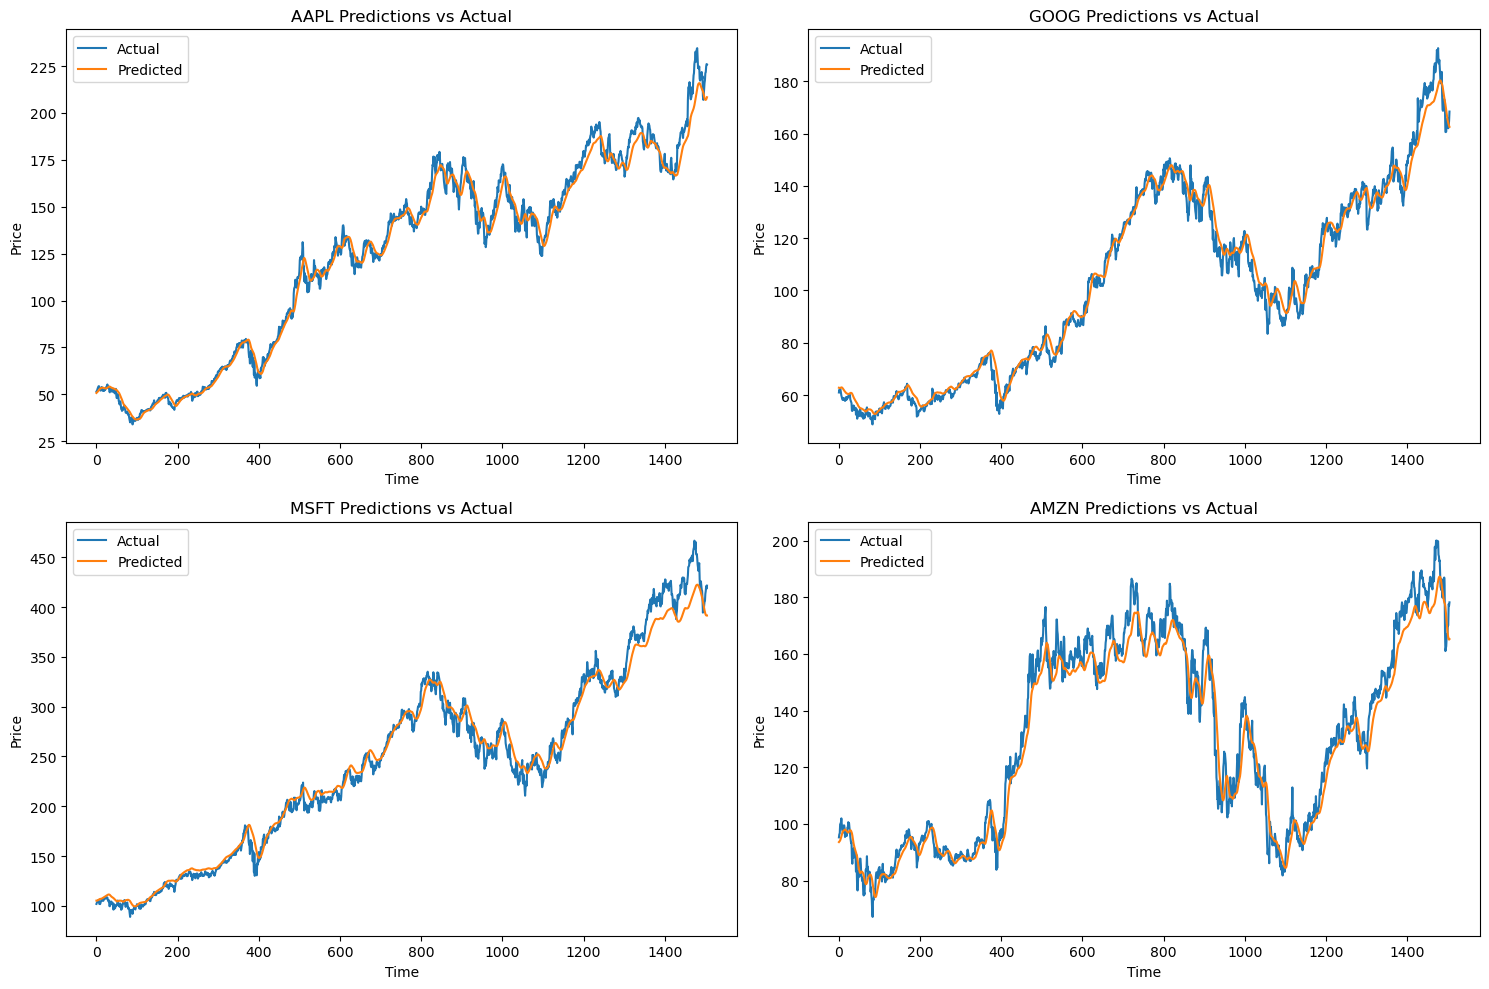

In [27]:
# Optionally, you can perform further analysis or plotting
# For example, you could plot the results for all companies using a loop
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

for i, stock in enumerate(tech_list):
    plt.subplot(2, 2, i + 1)
    plt.plot(all_results[stock]['actual'], label='Actual')
    plt.plot(all_results[stock]['predictions'], label='Predicted')
    plt.title(f'{stock} Predictions vs Actual')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()

plt.tight_layout()
plt.show()


In [28]:
# Dictionary to store predictions and actual prices for each company
today_predictions = {}

# Loop through each company in the tech list
for stock in tech_list:
    # Get the last 100 days of adjusted closing prices
    last_100_days = company_data[stock]['Adj_close_price'][-100:]
    
    # Scale the data to be between 0 and 1
    scaler = company_data[stock]['scaler']
    scaled_last_100_days = scaler.transform(last_100_days)
    
    # Reshape the data to match the model's input shape
    scaled_last_100_days = np.array(scaled_last_100_days)
    scaled_last_100_days = np.reshape(scaled_last_100_days, (1, scaled_last_100_days.shape[0], 1))
    
    # Predict the closing price for today
    model = company_data[stock]['model']
    predicted_price_today = model.predict(scaled_last_100_days)
    
    # Inverse transform to get the actual predicted price
    predicted_price_today = scaler.inverse_transform(predicted_price_today)
    predicted_price_today = predicted_price_today[0][0]
    
    # Get the actual closing price for today from the data using .iloc
    actual_price_today = last_100_days.iloc[-1, 0]
    
    # Store the results in the dictionary
    today_predictions[stock] = {
        'predicted_price': predicted_price_today,
        'actual_price': actual_price_today
    }
    
    # Display the predicted and actual prices
    print(f"{stock} - Predicted closing price for today: ${predicted_price_today:.2f}")
    print(f"{stock} - Actual closing price for today: ${actual_price_today:.2f}")

# Now the `today_predictions` dictionary holds the predicted and actual prices for all four companies.


1/1 [==============================] - 1s 895ms/step
AAPL - Predicted closing price for today: $213.34
AAPL - Actual closing price for today: $225.89
1/1 [==============================] - 1s 980ms/step
GOOG - Predicted closing price for today: $165.98
GOOG - Actual closing price for today: $168.40
1/1 [==============================] - 1s 984ms/step
MSFT - Predicted closing price for today: $414.61
MSFT - Actual closing price for today: $421.53
1/1 [==============================] - 1s 937ms/step
AMZN - Predicted closing price for today: $166.96
AMZN - Actual closing price for today: $178.22


In [29]:
# Dictionary to store predictions and actual prices for each company
yesterday_predictions = {}

# Loop through each company in the tech list
for stock in tech_list:
    # Get the last 100 days of data up until yesterday
    last_100_days_yesterday = company_data[stock]['Adj_close_price'][-101:-1]
    
    # Scale the data
    scaler = company_data[stock]['scaler']
    scaled_last_100_days_yesterday = scaler.transform(last_100_days_yesterday)
    
    # Reshape the data to match the model's input shape
    scaled_last_100_days_yesterday = np.array(scaled_last_100_days_yesterday)
    scaled_last_100_days_yesterday = np.reshape(scaled_last_100_days_yesterday, (1, scaled_last_100_days_yesterday.shape[0], 1))
    
    # Predict the closing price for today using data up until yesterday
    model = company_data[stock]['model']
    predicted_price_yesterday = model.predict(scaled_last_100_days_yesterday)
    
    # Inverse transform to get the actual predicted price
    predicted_price_yesterday = scaler.inverse_transform(predicted_price_yesterday)
    predicted_price_yesterday = predicted_price_yesterday[0][0]
    
    # Get the actual closing price for today
    actual_price_today = company_data[stock]['Adj_close_price'].iloc[-1, 0]
    
    # Store the results in the dictionary
    yesterday_predictions[stock] = {
        'predicted_price': predicted_price_yesterday,
        'actual_price': actual_price_today
    }
    
    # Display the predicted and actual prices
    print(f"{stock} - Predicted closing price for today (using yesterday's data): ${predicted_price_yesterday:.2f}")
    print(f"{stock} - Actual closing price for today: ${actual_price_today:.2f}")

# The `yesterday_predictions` dictionary now holds the predicted and actual prices for all four companies.


1/1 [==============================] - 0s 38ms/step
AAPL - Predicted closing price for today (using yesterday's data): $212.62
AAPL - Actual closing price for today: $225.89
1/1 [==============================] - 0s 37ms/step
GOOG - Predicted closing price for today (using yesterday's data): $166.15
GOOG - Actual closing price for today: $168.40
1/1 [==============================] - 0s 36ms/step
MSFT - Predicted closing price for today (using yesterday's data): $414.38
MSFT - Actual closing price for today: $421.53
1/1 [==============================] - 0s 36ms/step
AMZN - Predicted closing price for today (using yesterday's data): $166.53
AMZN - Actual closing price for today: $178.22


In [30]:
# Dictionary to store the percentage errors for all companies
percentage_errors = {}

# Loop through each company in the tech list
for stock in tech_list:
    # Extract the relevant data and model for the current stock
    data = company_data[stock]
    model = data['model']
    scaler = data['scaler']
    Adj_close_price = data['Adj_close_price']
    
    # Get the last 100 days of data up until yesterday
    last_100_days_yesterday = Adj_close_price[-101:-1]

    # Scale the data
    scaled_last_100_days_yesterday = scaler.transform(last_100_days_yesterday)

    # Reshape the data to match the model's input shape
    scaled_last_100_days_yesterday = np.array(scaled_last_100_days_yesterday)
    scaled_last_100_days_yesterday = np.reshape(scaled_last_100_days_yesterday, (1, scaled_last_100_days_yesterday.shape[0], 1))

    # Predict the closing price for today using data up until yesterday
    predicted_price_yesterday = model.predict(scaled_last_100_days_yesterday)

    # Inverse transform to get the actual predicted price
    predicted_price_yesterday = scaler.inverse_transform(predicted_price_yesterday)
    predicted_price_yesterday = predicted_price_yesterday[0][0]

    # Get the actual closing price for today
    actual_price_today = Adj_close_price.iloc[-1, 0]

    # Calculate the percentage error
    percentage_error = abs((predicted_price_yesterday - actual_price_today) / actual_price_today) * 100
    
    # Store the percentage error in the dictionary
    percentage_errors[stock] = percentage_error

    # Print the predicted, actual price, and percentage error
    print(f"\n{stock} Predicted closing price for today (using yesterday's data): ${predicted_price_yesterday:.2f}")
    print(f"{stock} Actual closing price for today: ${actual_price_today:.2f}")
    print(f"{stock} Percentage error in prediction: {percentage_error:.2f}%")

# Optionally, you can also print all the percentage errors at once
print("\nSummary of Percentage Errors:")
for stock, error in percentage_errors.items():
    print(f"{stock}: {error:.2f}%")


1/1 [==============================] - 0s 57ms/step

AAPL Predicted closing price for today (using yesterday's data): $212.62
AAPL Actual closing price for today: $225.89
AAPL Percentage error in prediction: 5.87%
1/1 [==============================] - 0s 37ms/step

GOOG Predicted closing price for today (using yesterday's data): $166.15
GOOG Actual closing price for today: $168.40
GOOG Percentage error in prediction: 1.34%
1/1 [==============================] - 0s 37ms/step

MSFT Predicted closing price for today (using yesterday's data): $414.38
MSFT Actual closing price for today: $421.53
MSFT Percentage error in prediction: 1.70%
1/1 [==============================] - 0s 38ms/step

AMZN Predicted closing price for today (using yesterday's data): $166.53
AMZN Actual closing price for today: $178.22
AMZN Percentage error in prediction: 6.56%

Summary of Percentage Errors:
AAPL: 5.87%
GOOG: 1.34%
MSFT: 1.70%
AMZN: 6.56%


In [34]:
# Initial investment amount
initial_money = 1000  # Start with 1000 pounds

# Dictionary to store daily investments
investment_history = {
    'day': [],
    'stock': [],
    'amount': [],
    'stocks_owned': [],
    'actual_price': [],
    'predicted_price': [],
    'total_value': []
}

# Initialize investment in a random or chosen stock on the first day
current_stock = tech_list[0]  # Start with the first stock in the list (e.g., AAPL)
current_price = company_data[current_stock]['Adj_close_price'].iloc[-1, 0]
stocks_owned = initial_money / current_price  # Calculate how many stocks can be bought

# Store initial investment details
investment_history['day'].append(0)
investment_history['stock'].append(current_stock)
investment_history['amount'].append(initial_money)
investment_history['stocks_owned'].append(stocks_owned)
investment_history['actual_price'].append(current_price)
investment_history['predicted_price'].append(yesterday_predictions[current_stock]['predicted_price'])
investment_history['total_value'].append(initial_money)

# Loop for the last 5 days investment strategy
for day in range(1, 6):  # Last 5 days
    # Find the stock with the highest predicted growth
    best_stock = None
    best_predicted_growth = -np.inf
    
    for stock in tech_list:
        yesterday_predicted = yesterday_predictions[stock]['predicted_price']
        today_actual = company_data[stock]['Adj_close_price'].iloc[-1 - day, 0]
        predicted_growth = (yesterday_predicted - today_actual) / today_actual
        
        if predicted_growth > best_predicted_growth:
            best_predicted_growth = predicted_growth
            best_stock = stock

    # If the best stock is not the current stock, sell current holdings and reinvest in the best stock
    if best_stock != current_stock:
        # Sell current stock holdings
        money_available = stocks_owned * current_price
        
        # Update to new stock and recalculate stocks_owned
        current_stock = best_stock
        current_price = company_data[current_stock]['Adj_close_price'].iloc[-1 - day, 0]
        stocks_owned = money_available / current_price
    
    # Update the investment history
    investment_history['day'].append(day)
    investment_history['stock'].append(current_stock)
    investment_history['amount'].append(money_available)
    investment_history['stocks_owned'].append(stocks_owned)
    investment_history['actual_price'].append(current_price)
    investment_history['predicted_price'].append(yesterday_predictions[current_stock]['predicted_price'])
    investment_history['total_value'].append(stocks_owned * current_price)

    # Print the daily investment details
    print(f"Day {day}: Invested in {current_stock}")
    print(f"Actual Price: {current_price:.2f}, Predicted Price: {yesterday_predictions[current_stock]['predicted_price']:.2f}")
    print(f"Total Value: {stocks_owned * current_price:.2f}\n")

# Final Results
print("\nFinal Investment Results:")
print(f"Total Value After Investment: {investment_history['total_value'][-1]:.2f} pounds")
print(f"Stock Held: {investment_history['stock'][-1]}")

# The investment history dictionary now holds the daily investment details for the last 5 days.


Day 1: Invested in GOOG
Actual Price: 164.74, Predicted Price: 166.15
Total Value: 1000.00

Day 2: Invested in GOOG
Actual Price: 164.74, Predicted Price: 166.15
Total Value: 1000.00

Day 3: Invested in GOOG
Actual Price: 164.74, Predicted Price: 166.15
Total Value: 1000.00

Day 4: Invested in MSFT
Actual Price: 413.27, Predicted Price: 414.38
Total Value: 1000.00

Day 5: Invested in MSFT
Actual Price: 413.27, Predicted Price: 414.38
Total Value: 1000.00


Final Investment Results:
Total Value After Investment: 1000.00 pounds
Stock Held: MSFT
